In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
cryptocurrency_df = pd.read_csv('crypto_data.csv')
cryptocurrency_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
cryptocurrency_df.shape

(1252, 7)

In [5]:
cryptocurrency_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [6]:
cryptocurrency_df = cryptocurrency_df[cryptocurrency_df['IsTrading'] == True]
cryptocurrency_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
cryptocurrency_df = cryptocurrency_df.drop(columns ='IsTrading')
cryptocurrency_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
for column in cryptocurrency_df.columns:
    print(f"Column {column} has {cryptocurrency_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [9]:
crypto_df = cryptocurrency_df.dropna()

In [10]:
for column in cryptocurrency_df.columns:
    print(f"Column {column} has {cryptocurrency_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


No nulls, so we can move to finding mined cryptos

In [11]:
cryptocurrency_df = cryptocurrency_df[cryptocurrency_df["TotalCoinsMined"]> 0]
cryptocurrency_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
cryptocurrency_df.drop(['Unnamed: 0', 'CoinName'], axis=1, inplace= True)
cryptocurrency_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [13]:
crytpocurrency_edit = pd.get_dummies(cryptocurrency_df, columns=['Algorithm', 'ProofType'], drop_first=True, dtype=float)
crytpocurrency_edit

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.076842e+08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1242,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,7.296538e+06,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
crytpocurrency_edit.columns

Index(['TotalCoinsMined', 'TotalCoinSupply', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScrypt', 'Algorithm_Ouroboros',
   

In [16]:
scale = StandardScaler()
cryptocurrency_scaled_df = scale.fit_transform(crytpocurrency_edit)

In [17]:
len(crytpocurrency_edit.columns)

96

In [18]:
pca_features = PCA(n_components=0.90)
cryptocurrency_pcafeatures = pca_features.fit_transform(cryptocurrency_scaled_df)
cryptocurrency_pcafeatures

array([[-3.35913620e-01,  1.04340531e+00, -5.37409264e-01, ...,
         3.96679829e-15,  3.94141861e-16,  4.12089890e-15],
       [-3.19248850e-01,  1.04354697e+00, -5.37804309e-01, ...,
         3.76673400e-15,  2.49337104e-16,  3.55201583e-15],
       [ 2.30471594e+00,  1.66999561e+00, -6.24076993e-01, ...,
         1.90287255e-15, -6.70621395e-14, -7.84013462e-14],
       ...,
       [ 3.24179380e-01, -2.32278089e+00,  3.87363001e-01, ...,
         2.31004241e-14, -1.10454953e-13, -4.04186663e-14],
       [-1.49546262e-01, -2.05899360e+00,  3.79619710e-01, ...,
         3.97065585e-15, -1.97026901e-15,  2.89049835e-15],
       [-2.90587486e-01,  8.27023611e-01, -2.51533368e-01, ...,
         4.19347026e-15, -2.29058048e-15,  3.72089446e-15]])

In [19]:
cryptocurrency_pcafeatures_df = pd.DataFrame(data=cryptocurrency_pcafeatures)
cryptocurrency_pcafeatures_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,-4.364932e-14,3.249613e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,2.111954e-16,4.990967e-17,-1.589248e-18,-8.273444e-16,-2.107261e-15,-6.460354e-15,-2.188289e-15,3.966798e-15,3.941419e-16,4.120899e-15
1,-0.319249,1.043547,-0.537804,0.001337,-4.370949e-14,3.260245e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,2.395980e-16,1.304518e-16,-1.085666e-16,-1.051750e-15,-2.228620e-15,-6.545091e-15,-2.226101e-15,3.766734e-15,2.493371e-16,3.552016e-15
2,2.304716,1.669996,-0.624077,0.004420,-6.792539e-14,4.166980e-14,-0.062312,-1.554093,-0.945690,0.375087,...,-1.174593e-14,8.191332e-15,-7.242621e-14,-3.341046e-14,4.608958e-14,1.395859e-14,1.547672e-14,1.902873e-15,-6.706214e-14,-7.840135e-14
3,-0.145455,-1.323925,0.177429,-0.001167,1.751217e-14,-1.366167e-14,0.000326,0.283548,0.252906,-0.079820,...,-3.433881e-15,-4.638376e-15,-8.058235e-15,6.148385e-16,1.542413e-14,4.311477e-15,5.914555e-15,5.953485e-15,-2.661593e-14,-2.021233e-14
4,-0.151951,-2.044976,0.364208,-0.001636,3.208023e-14,-1.805419e-14,0.032350,0.524429,0.191031,0.074021,...,-1.013016e-14,-1.339723e-13,1.358793e-13,6.926343e-14,5.786080e-14,-1.583295e-14,1.617152e-13,1.314345e-13,-1.675169e-13,-6.900679e-14


In [20]:
pca_features.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

In [21]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(cryptocurrency_pcafeatures_df)

In [22]:
tsne_features.shape

(532, 2)

In [25]:
cryptocurrency_pcafeatures_df['cryptocurrency_edithorizontal'] = tsne_features[:,0]
cryptocurrency_pcafeatures_df['cryptocurrency_editvertical'] = tsne_features[:,1]

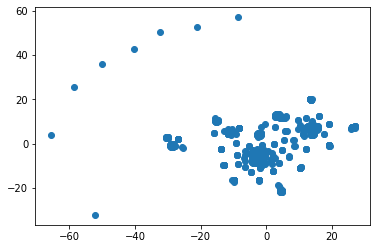

In [26]:
plt.scatter(cryptocurrency_pcafeatures_df['cryptocurrency_edithorizontal'], cryptocurrency_pcafeatures_df['cryptocurrency_editvertical'])
plt.show()

In [27]:
inertia = []
k = list(range(1, 10))

In [28]:
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(cryptocurrency_pcafeatures_df)
    inertia.append(km.inertia_)

c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [29]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,325610.740570
1,2,191580.141427
2,3,125902.363093
3,4,105509.283053
4,5,93089.862429


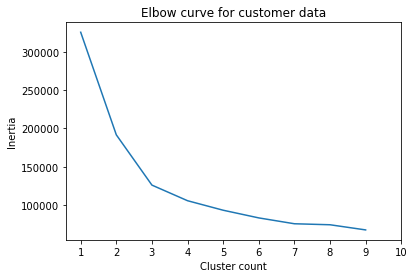

In [30]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Cluster count')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Since the optimal "k" value is 3, the I would suggest clusing CryptoCurrency Data into 3 separate groups.